In [2]:
import pandas as pd

In [3]:
elevation_data = pd.read_csv('data/SPR_TotET6yrmean_elev_long.csv')
et_data = pd.read_csv('data/SPR_TotET6yrmean_elev_wide.csv')
all_et_data = pd.read_csv('data/ET_elev_interp_50m_long.csv')

Index(['Unnamed: 0', 'Distance_km', 'Elev_m', 'TotET_mm', 'slope_pct'], dtype='object')


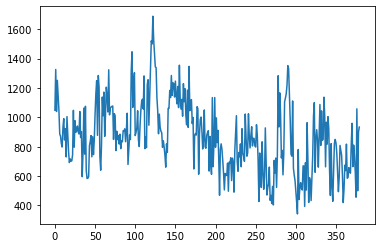

In [10]:
print(et_data.columns)
data = et_data.TotET_mm
data.plot()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def fft_fit(data, title):

    fs = 1000
    time = np.arange(len(data)) / fs
    x = data

    # Divide the time series into frequencies:
    freqs = np.fft.fftfreq(time.size, 1/fs)
    idx = np.argsort(freqs[:])

    # Power spectral density is square of fft:
    ps = np.abs(np.fft.fft(data))**2

    # Setup the data for fitting a log-log linear trend:
    x = freqs[idx]
    y = ps[idx]
    y_ok = y[~(x==0)]
    x_ok = x[~(x==0)]

    x_fit = np.array(np.log10(abs(x_ok))).reshape((-1, 1))
    y_fit = np.array(np.log10(y_ok))

    # Fit the linear log-log model:
    model = LinearRegression()
    model.fit(x_fit,y_fit)

    r_sq = model.score(x_fit, y_fit)
    print('coeff of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope:', model.coef_)

    # Get predicted y values from model:
    y_pred = model.predict(x_fit)

    plt.figure()
    plt.plot(abs(freqs[idx]), ps[idx], '.')
    plt.plot(pow(10,x_fit), pow(10,y_pred))
    plt.title(
        'Power Spectral Density, {title} Annual ET'.format(title=title))
    plt.yscale('log')
    plt.xscale('log')
    plt.ylim((1e5, 1e10))
    plt.xlabel('frequency')
    plt.ylabel('PSD')
    plt.show()


coeff of determination: 0.4794824519705772
intercept: 9.955378508284705
slope: [-1.2665953]


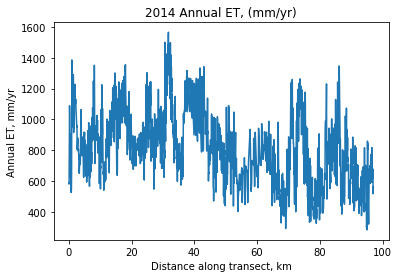

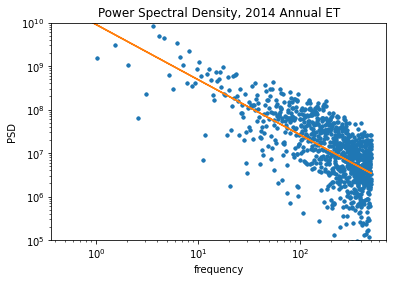

coeff of determination: 0.4627877813487789
intercept: 9.889139678533532
slope: [-1.22952376]


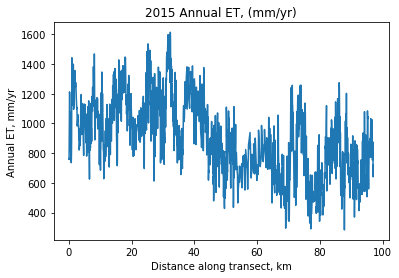

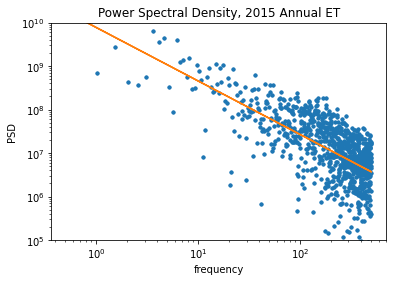

coeff of determination: 0.4686447123022697
intercept: 10.114970553885463
slope: [-1.25052199]


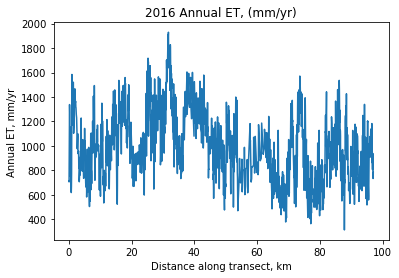

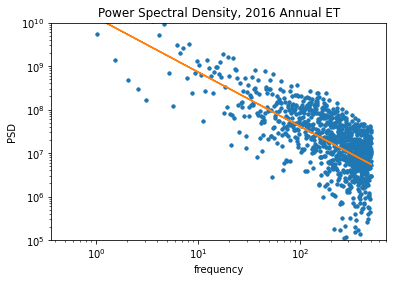

coeff of determination: 0.49247133165236234
intercept: 10.164634996664319
slope: [-1.34313119]


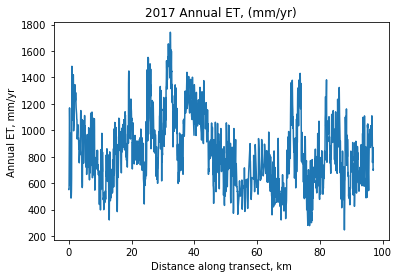

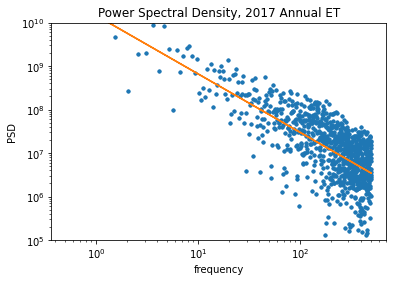

coeff of determination: 0.4864544191420367
intercept: 10.032290546527626
slope: [-1.25750887]


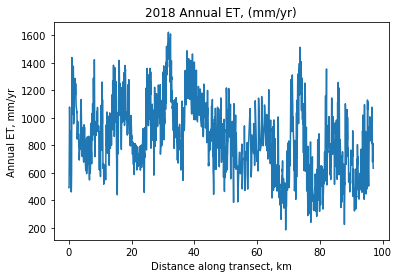

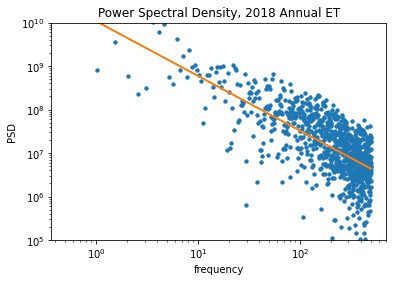

coeff of determination: 0.46730931524961195
intercept: 9.996966413813576
slope: [-1.25372689]


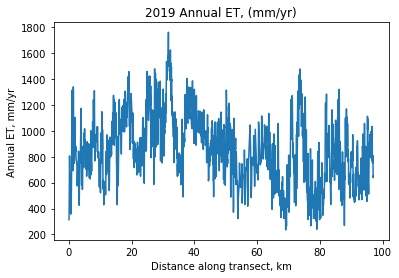

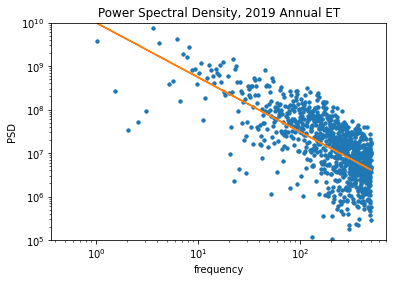

coeff of determination: 0.4704804732823234
intercept: 9.990190298152907
slope: [-1.26928699]


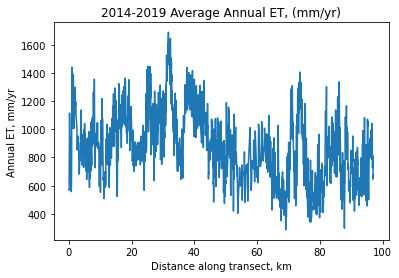

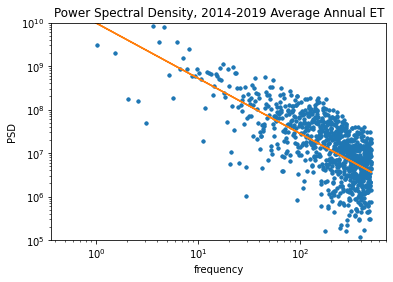

In [29]:
all_vars = all_et_data['variable'].unique()
years = all_vars[1:]
year_label = {
    'ET14_mm': '2014',
    'ET15_mm': '2015',
    'ET16_mm': '2016',
    'ET17_mm': '2017',
    'ET18_mm': '2018',
    'ET19_mm': '2019',
    'ETMN_mm': '2014-2019 Average'
}

for year in years:
    df = all_et_data.loc[all_et_data['variable'] == year]
    plt.figure()
    plt.plot(df.Distance_km, df.value)
    plt.xlabel('Distance along transect, km')
    plt.ylabel('Annual ET, mm/yr')
    plt.title('{title} Annual ET, (mm/yr)'.format(title=year_label[year]))
    
    fft_fit(df.value, year_label[year])

    

# Ignore Below

coeff of determination: 0.2752573344072893
intercept: 8.64708150341551
slope: [-0.84050977]


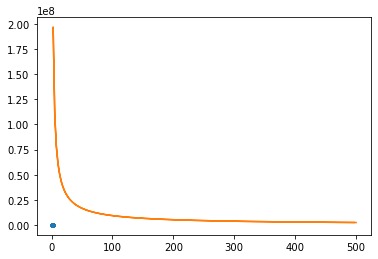

In [107]:
from sklearn.linear_model import LinearRegression

x = freqs[idx]
y = ps[idx]
y_ok = y[~(x==0)]
x_ok = x[~(x==0)]


x_fit = np.array(np.log10(abs(x_ok))).reshape((-1, 1))
y_fit = np.array(np.log10(y_ok))

model = LinearRegression()
model.fit(x_fit,y_fit)

r_sq = model.score(x_fit, y_fit)
print('coeff of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

y_pred = model.predict(x_fit)

plt.figure()
plt.plot(x_fit, y_fit, '.')
plt.plot(pow(10,x_fit), pow(10,y_pred))


Text(0.5, 1.0, 'Power spectrum (np.fft.fft)')

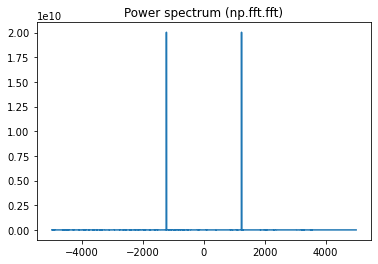

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

# np.fft.fft
freqs = np.fft.fftfreq(time.size, 1/fs)
idx = np.argsort(freqs)
ps = np.abs(np.fft.fft(x))**2
plt.figure()
plt.plot(freqs[idx], ps[idx])
plt.title('Power spectrum (np.fft.fft)')